# Thomas Kiely: ETIVITY 3
- 17185203

### Task 2
Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster the loans_train_prepared dataset (i.e. the result of the example notebook for e-tivity 2). Use the k-Means clustering algorithm and visualise the clustering. Pick a value of k suggested by the MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.

### Task 3
Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), then compute a new k-Means clustering.

### Task 4
Apply another clustering algorithm (from the ones available in scikit-learn) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.cluster import KMeans, AgglomerativeClustering 

from sklearn import preprocessing
from sklearn.metrics import silhouette_score

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from sklearn.decomposition import PCA 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

%matplotlib inline 

In [4]:
df = pd.read_csv("./loans_train_prepared-1.csv")
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305


In [5]:
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [6]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# 2: K Means Clustering

## K = 8

In [7]:
k = 8

In [8]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df)

In [9]:
data_and_centers = np.r_[df,clustered_data_sklearn.cluster_centers_]

transformation complete


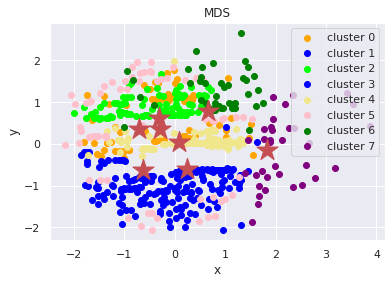

In [10]:
#Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

transformation complete


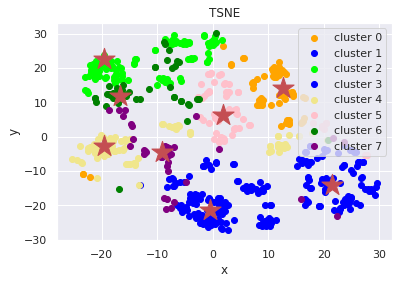

In [11]:
# Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples. 
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [12]:
df['cluster_8'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster_8
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,4
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,2
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,0
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,2


In [13]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster_8
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,1
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,4
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,6
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,6
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,1


In [14]:
df.groupby('cluster_8').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster_8,,,,,,,,,,,,,,,,
0,0.291005,0.786057,0.975374,0.684524,1.000000,0.952381,0.000000,0.730159,0.000000,0.111111,0.063492,1.000000,0.000000,0.428571,0.698413,0.697736
1,0.099291,0.868238,0.982417,0.731649,0.914894,0.414894,0.021277,0.000000,0.021277,0.138298,0.053191,0.212766,0.797872,0.000000,0.712766,0.723146
2,0.224422,0.733257,0.902490,0.712376,0.990099,0.801980,0.009901,0.603960,0.009901,0.059406,0.069307,0.000000,0.000000,1.000000,0.801980,0.631675
3,0.306452,0.826319,1.078200,0.721169,0.991935,0.854839,0.008065,1.000000,0.000000,0.112903,0.032258,0.193548,1.000000,0.000000,0.903226,0.811224
4,0.226190,0.858446,1.096759,0.708036,0.976190,0.952381,0.023810,0.738095,0.000000,0.130952,0.059524,0.000000,0.000000,0.000000,0.797619,0.878851
5,0.272727,0.777312,0.997717,0.719697,0.000000,0.818182,0.045455,0.696970,0.000000,0.090909,0.015152,0.378788,0.272727,0.363636,0.000000,0.716405
6,0.283688,1.311582,1.329051,0.694149,0.872340,0.851064,0.021277,0.659574,0.000000,0.297872,0.085106,0.021277,0.000000,0.957447,0.595745,1.375826
7,0.390476,2.002010,1.763256,0.717857,0.857143,0.828571,0.085714,0.800000,0.000000,0.314286,0.057143,0.028571,0.457143,0.142857,0.657143,1.931284


In [15]:
df.groupby('cluster_8').count()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster_8,,,,,,,,,,,,,,,,
0,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
1,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
2,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
3,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124
4,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
5,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
6,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
7,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35


#### Analysis
- `cluster 7` applicants have the highest amount of `dependents` while `cluster 1` has the lowest
- `cluster 6` has the highest `applicantIncome` while `cluster 2` has the lowest
- `cluster 1` has less than 50% male applicants, while every other cluster is predominantly male
- `cluster 3` applicants are all married
- `cluster 3` applicants all live in semi urban areas while `cluster 2` applicants all live in urban areas
- `cluster 3` is the largest cluster with 124 applicants while `cluster 7` is the smallest with only 35 applicants

*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*

# 3: K Means Clustering
## Elbow Method

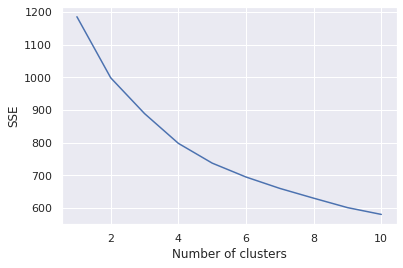

In [16]:
df = pd.read_csv("./loans_train_prepared-1.csv")
np_data = df[df.columns.difference(['Loan_Status_Y'])]
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(np_data)
    np_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

#### Silhouette Scores

In [14]:
df = pd.read_csv("./loans_train_prepared-1.csv")
X = np.array(df.values, dtype=float)
y = np.array(df.values, dtype=float)
best = 0
sil_scores = []
k = []
for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    sil_scores.append(sil_coeff)
    k.append(n_cluster)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.15345667241994654
For n_clusters=3, The Silhouette Coefficient is 0.15551634932637773
For n_clusters=4, The Silhouette Coefficient is 0.15520273853358452
For n_clusters=5, The Silhouette Coefficient is 0.15993211579405658
For n_clusters=6, The Silhouette Coefficient is 0.1608268104928739
For n_clusters=7, The Silhouette Coefficient is 0.1577766496313937
For n_clusters=8, The Silhouette Coefficient is 0.1586654019355285
For n_clusters=9, The Silhouette Coefficient is 0.16029156610467468


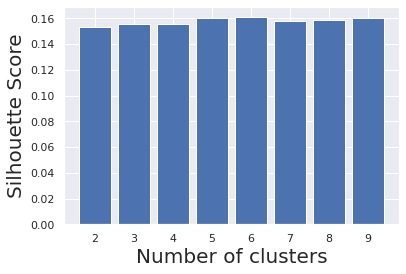

In [16]:
plt.bar(k, sil_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Score', fontsize = 20) 
plt.show()

From the above results we can see that the values after 'k=6' decrease  lower except for 9 which is similar. 
Analysing both the elbow and silhouette approaches suggest that 6 is an optimal estimate for cluster count in this dataset


*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*

## K Means (K = 6)

In [18]:
k = 6

In [19]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [20]:
data_and_centers = np.r_[df,clustered_data_sklearn.cluster_centers_]

transformation complete


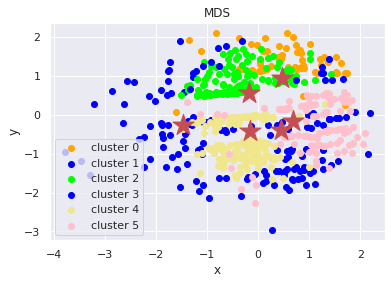

In [21]:
#Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

transformation complete


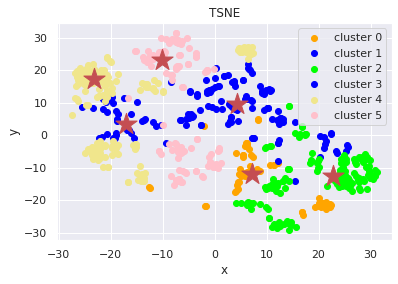

In [22]:
# Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples. 
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

transformation complete


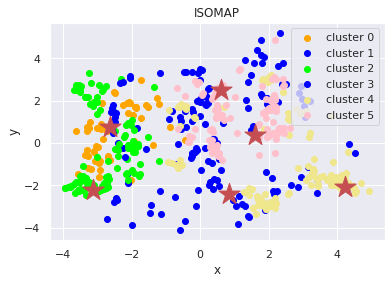

In [23]:
XYcoordinates = manifold.Isomap(n_components=2).fit_transform(data_and_centers)
print("transformation complete")
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='ISOMAP')

# 4: Other Clustering Method (Hierarchical Clustering)

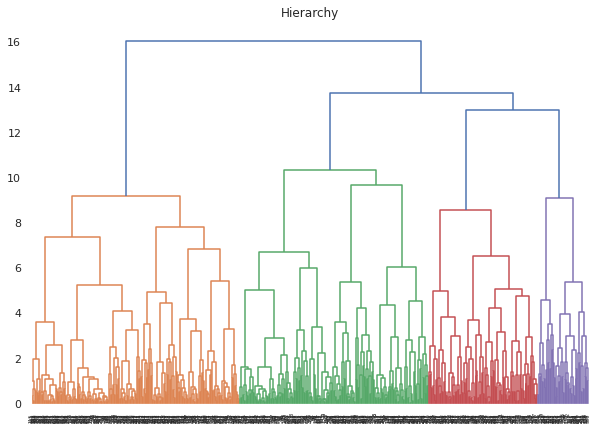

In [24]:
plt.figure(figsize=(10, 7))
plt.title("Hierarchy")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

From the above graph we can identify the largest vertical distance between horizontal lines to be in the following region between the red horizontal lines:
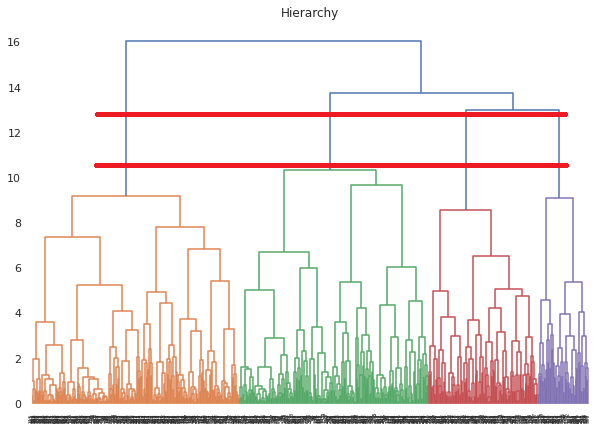

Using this distance as a guideline, we can cut through the graph with horizontal lines at the top and bottom of this area
From this we can see that the horizontal lines pass through 4 vertical lines.
This allows us to estimate that 4 is the optimal cluster count for this dataset. 


#### Hierarchical Clustering vs K-Means Clustering
- K-means produces unstructured results while hierarchical clustering produces more interpretable results
- Dendrograms make it easier to determine the number of clusters in the dataset
- K means works faster on datasets with a large number of attributes

### Cluster Analysis

In [25]:
df['cluster_6'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [26]:
df.groupby('cluster_6').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster_6,,,,,,,,,,,,,,,,
0,0.127778,0.813004,0.989033,0.720833,0.850000,0.000000,0.116667,0.400000,0.016667,0.166667,0.083333,0.166667,0.933333,0.000000,0.750000,0.708956
1,0.387978,1.774661,1.591612,0.698770,0.852459,0.819672,0.065574,0.754098,0.000000,0.344262,0.049180,0.032787,0.295082,0.327869,0.639344,1.754689
2,0.268065,0.844020,1.063763,0.721678,0.986014,1.000000,0.000000,0.741259,0.006993,0.125874,0.020979,0.223776,1.000000,0.000000,0.874126,0.807608
3,0.295019,0.797361,1.025548,0.695977,0.287356,0.919540,0.011494,0.827586,0.000000,0.091954,0.022989,0.425287,0.183908,0.298851,0.011494,0.740813
4,0.340000,0.811936,1.044568,0.699167,0.993333,0.980000,0.000000,1.000000,0.000000,0.100000,0.073333,0.206667,0.000000,0.633333,0.906667,0.796253
5,0.053097,0.830929,0.941099,0.738938,0.946903,0.610619,0.008850,0.000000,0.008850,0.088496,0.070796,0.194690,0.000000,0.539823,0.672566,0.714504


In [27]:
df.groupby('cluster_6').count()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster_6,,,,,,,,,,,,,,,,
0,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
1,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
2,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
3,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
4,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
5,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113


From the above tables it is possible to make a few observations
- `cluster 1` has the most `dependents` with the least in `cluster 5`
- `cluster 1` has the highest `ApplicantIncome` by a wide margin while `cluster 3` has the lowest.
- `cluster 5` also has the lowest `loanAmount` while `cluster 1` has the highest
- `cluster 2` contains only male applicants while `cluster 0` contains only female applicants
- `cluster 4` contain only applicants who are married
- `cluster 2` applicants all live in semi urban areas
- `cluster 4` is the largest with 150 applicants, while `cluster 0` is the smallest with only 60 applicants

*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*